In [1]:
"""
seaborn系列 (4) | 分类图catplot() 原创
脑机接口社区2021-09-07 11:40:05博主文章分类：数据分析与可视化

本篇是《Seaborn系列》文章的第4篇-分类图。

分类图
分类图catplot()
解析：
catplot() 分类图(它是下面8种图的接口，下面八种图表均可通过指定kind参数来绘制)
1.stripplot() 分类散点图
2.swarmplot() 能够显示分布密度的分类散点图
3.boxplot() 箱图、盒形图
4.violinplot() 小提琴图
5.boxenplot() 增强箱图
6.pointplot() 点图
7.barplot() 条形图
8.countplot() 计数图

函数原型
seaborn.catplot(x=None, y=None, hue=None,
                data=None, row=None, col=None,
                col_wrap=None, estimator=<function mean>, ci=95, 
                n_boot=1000, units=None, order=None,
                hue_order=None, row_order=None, col_order=None, 
                kind='strip', height=5, aspect=1, orient=None, 
                color=None, palette=None, legend=True,
                legend_out=True, sharex=True, sharey=True, 
                margin_titles=False, facet_kws=None, **kwargs)
                
参数解读
必须的参数data 其他参数均为可选；

data:是DataFrame类型的;

x,y为数据中变量的名称(如上表，date,name,age,sex为数据字段变量名);

row，col：数据中变量的名称
作用：设置分类变量将决定网格的分面。

kind：字符串
要绘制的绘图类型
(对应于分类绘图功能的名称:"count"-统计图, "point"-点, 
"bar"-条形, "strip"-条形, "swarm"-群形, "box"-框形, 
"violin"-小提琴形, or"boxen"-盒形.）

col_wrap:int类型数值
作用：让每行显示指定数量的图，如果超过该数量，则多行显示。

orient:方向：v或者h
作用：设置图的绘制方向(垂直或水平)
如何选择：一般是根据输入变量的数据类型(dtype)推断出来。
-----------------------------------
©著作权归作者所有：来自51CTO博客作者脑机接口社区的原创作品，请联系作者获取转载授权，否则将追究法律责任
seaborn系列 (4) | 分类图catplot()
https://blog.51cto.com/u_6811786/3790242
"""
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
# 获取数据
exercise = sns.load_dataset("exercise", data_home='./seaborn-data', cache=True)
# 查看前5条
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


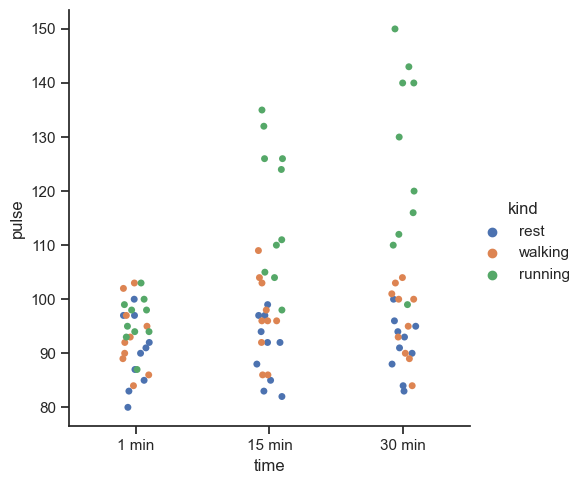

In [2]:
"""
案例1：基本分类图
"""
sns.catplot(x="time", y="pulse", hue="kind", data=exercise)
plt.show()

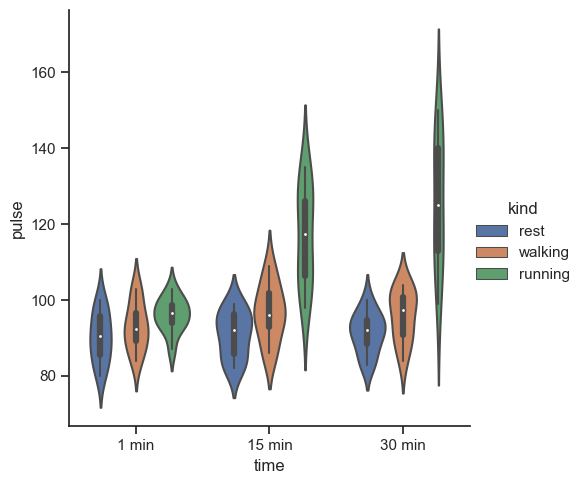

In [3]:
"""
案例2：通过设置kind来指定绘制的图类型

kind="violin" 则表示绘制小提琴图
"""
sns.catplot(x="time", y="pulse", hue="kind",data=exercise, kind="violin")
plt.show()

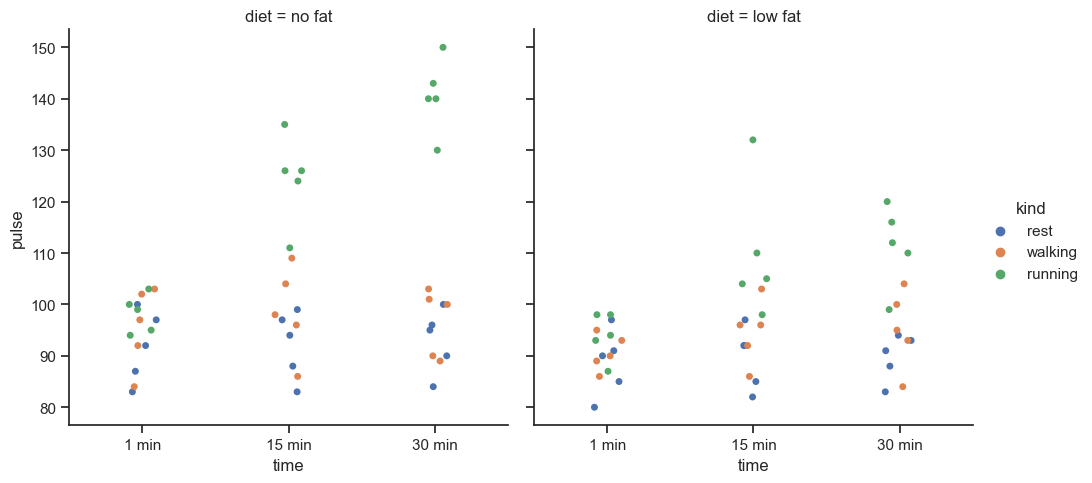

In [4]:
"""
案例3：根据col分类，以列布局绘制多列图
设置col，根据指定的col的变量名，以列的形式显示(eg.col='diet',则在列的方向上显示，显示图的数量为diet列中对值去重后的数量)
"""
sns.catplot(x="time", y="pulse", hue="kind",col="diet", data=exercise)
plt.show()

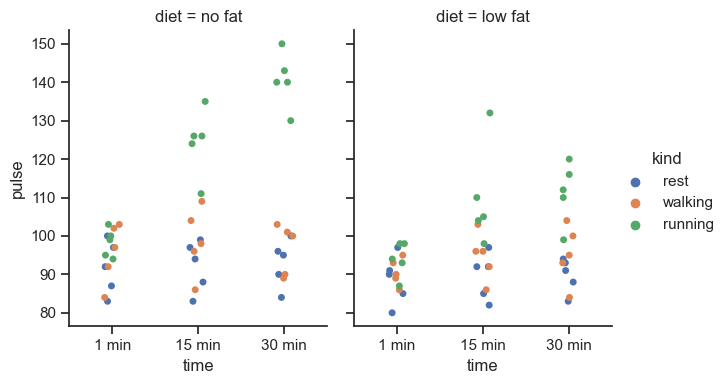

In [5]:
"""
案例4：绘图时，设置图(facets)的高度和宽度比
"""
sns.catplot(x="time", y="pulse", hue="kind",col="diet", data=exercise,height=4, aspect=.8)
plt.show()

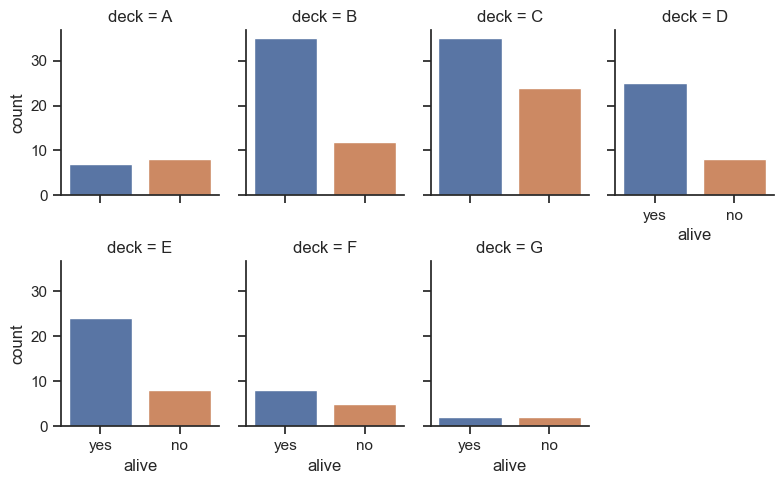

In [7]:
"""
案例5：利用catplot()绘制柱状图 kind="count"
设置col_wrap一个数值，让图每行只显示数量为该数值的列，多余的另起一行显示
"""
# 使用 titanic数据集
titanic = sns.load_dataset("titanic", data_home='./seaborn-data', cache=True)
#去掉deck这一列中值为空的数据
data=titanic[titanic.deck.notnull()]
sns.catplot(x="alive", col="deck", col_wrap=4,data=data,kind="count", height=2.5, aspect=.8)
plt.show()

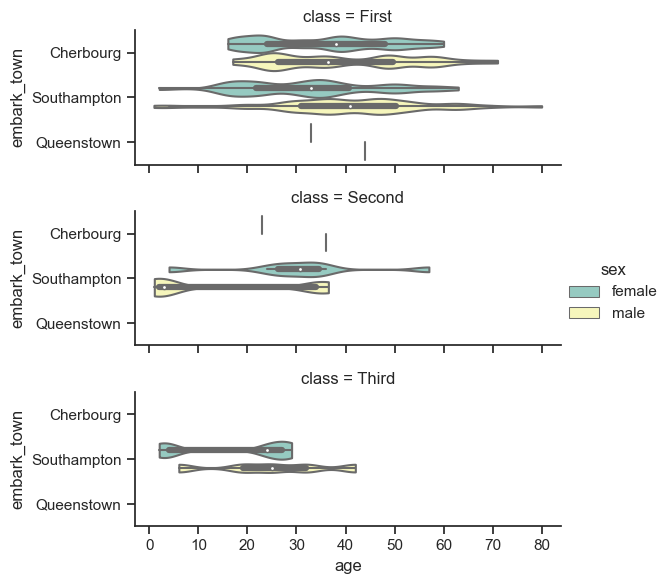

In [8]:
# 水平绘图，并将其他关键字参数传递给绘图函数
"""
案例6：利用catplot()绘制小提琴图 kind="violin"

orient设置图的方向
"""
sns.catplot(x="age", y="embark_town",hue="sex", row="class",
            data=data,
            orient="h", height=2, aspect=3, palette="Set3",
            kind="violin",dodge=True,  cut=0, bw=.2)
plt.show()